# Case Studies : Direct marketing campaigns of a Portuguese banking institution

Kumaran Ragunathan

Problem Definition : The aforementioned data set includes direct marketing campaigns (i.e. phone calls) of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit (indicated in the y variable). Create a model that will help this banking institution determine, in advance, clients who will be receptive to such marketing campaigns. Clearly state the metric used for this problem.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### Loading dataset

In [2]:
df=pd.read_csv("./dataset/bank-additional-full.csv",sep=';')

### Dropping features 'duration' and 'campaign'

Task is to create a model that will help this banking institution determine, in advance, clients who will be receptive to such marketing campaigns. "Duration" is determined after a call is made and and highly corelated with the target value. To create a realistic model "Duration" should be droped. "campaign" is the number of contact made during the current marketing campaign but the task is to determine the targeted clients before the campaign so we drop this variables from the dataset.

In [3]:
df=df.drop(['duration', 'campaign'],axis=1)
df.shape

(41188, 19)

### Explore the dataset

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Checking for missing values

Checking columns with Null/ Nan values

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Above checking for missing values indicates that there are no Null or Nan values present in any feature. Further missing value analysis for categorical and nuemrical variables are performed below and impuation is performed for certain variables.

## Target variable Analysis

no     36548
yes     4640
Name: y, dtype: int64

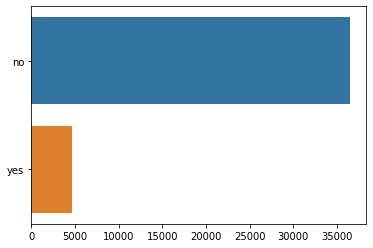

In [6]:
sns.barplot(df['y'].value_counts().values,df['y'].value_counts().index)

df.y.value_counts()

Above barplot indicates that given dataset is having two classes in the target variable hence it is a binary classification problem and the dataset is **highly class imbalance** with 'no' class with 88.73% and 'yes' class with 11.27%.

## Analysis of categorical variables

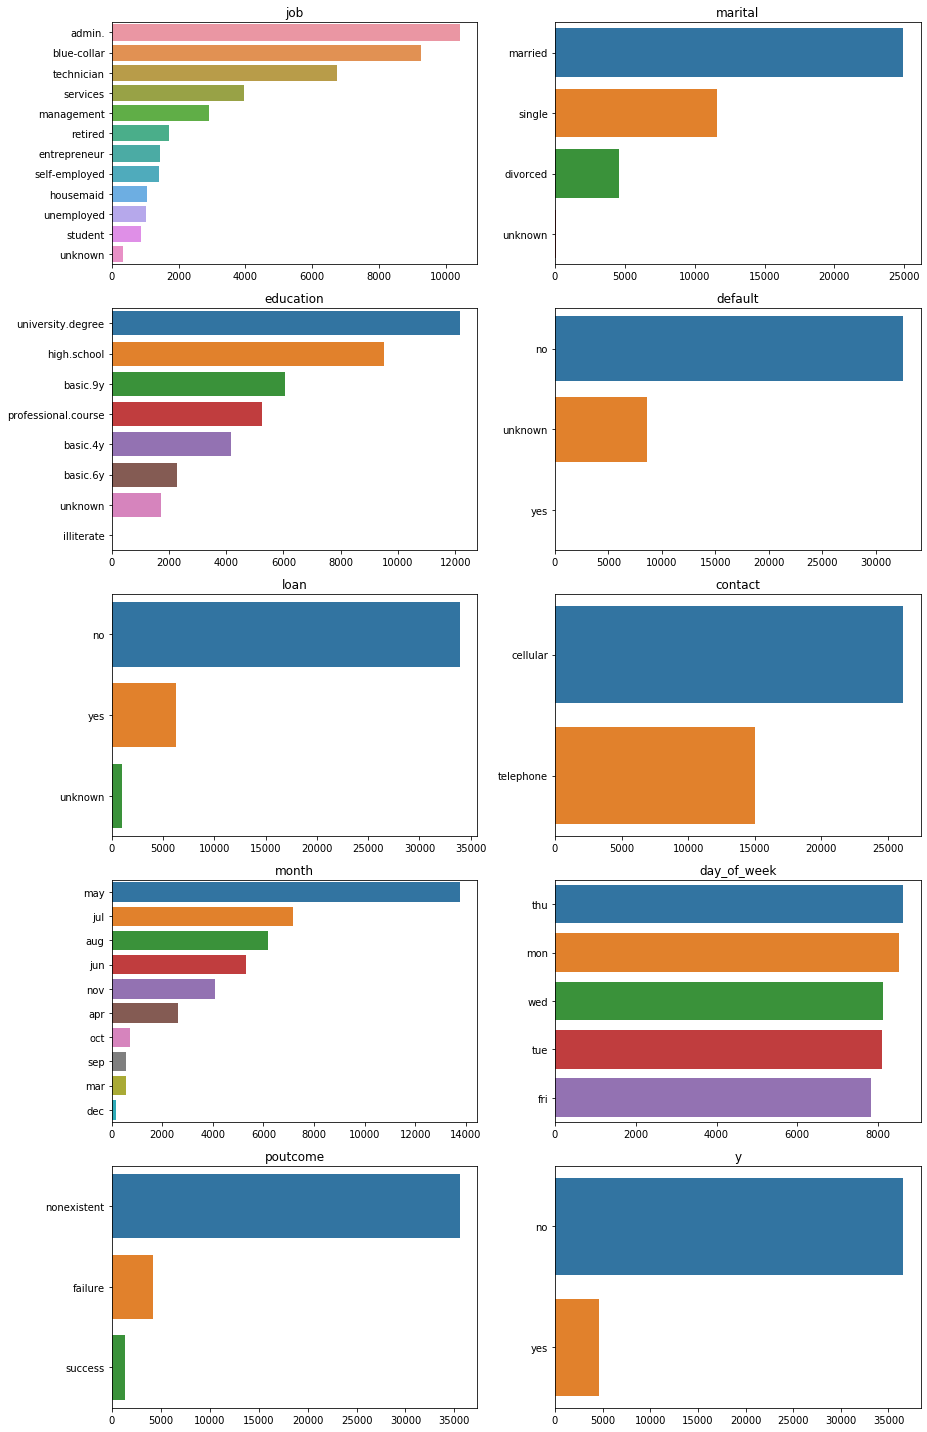

In [7]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
fig, axis = plt.subplots(5, 2, figsize=(13,20))
axis = axis.flatten()
index =0
for col in categorcial_variables:
    axis[index].set_title(col)
    sns.barplot(x=df[col].value_counts().values,y=df[col].value_counts().index , ax=axis[index])
    index +=1
fig.tight_layout()

Categorical features "job", "marital", "education", "default", "loan" are having the value 'unknown' which can be considered as missing values. But in a real setting these values may not be able to obtain. So we treat them as a separate value.

"marital" is having a very low number of 'unknown' values.

"default" is a details of credit in default feature which is argueably have a value "unknown" as a recorded value.

Hence , we do not remove or impute "unknown" values for the features and we treat 'unknown' as another value for the above variables.

## Helper function

Here we analyze the success rate with categorical variables for each value in that category.

In [8]:
def cat_analysis(feature):
    df_2 = pd.DataFrame()
    df_2 = pd.crosstab(df[feature], df['y'])
    df_2['success_rate'] = df_2['yes']/(df_2['yes']+df_2['no'])
    df_2 = df_2.sort_values(by=['success_rate'], ascending=False)
    print(df_2)
    df_2 = df_2[['yes','no']]
    df_2.plot.bar(stacked=True, figsize=(15,6), color=['green','orange'])

### Job distribution

Here we analyze the job distribution with categorical values and sort them by success percentage in decending order.

y                no   yes  success_rate
job                                    
student         600   275      0.314286
retired        1286   434      0.252326
unemployed      870   144      0.142012
admin.         9070  1352      0.129726
management     2596   328      0.112175
unknown         293    37      0.112121
technician     6013   730      0.108260
self-employed  1272   149      0.104856
housemaid       954   106      0.100000
entrepreneur   1332   124      0.085165
services       3646   323      0.081381
blue-collar    8616   638      0.068943


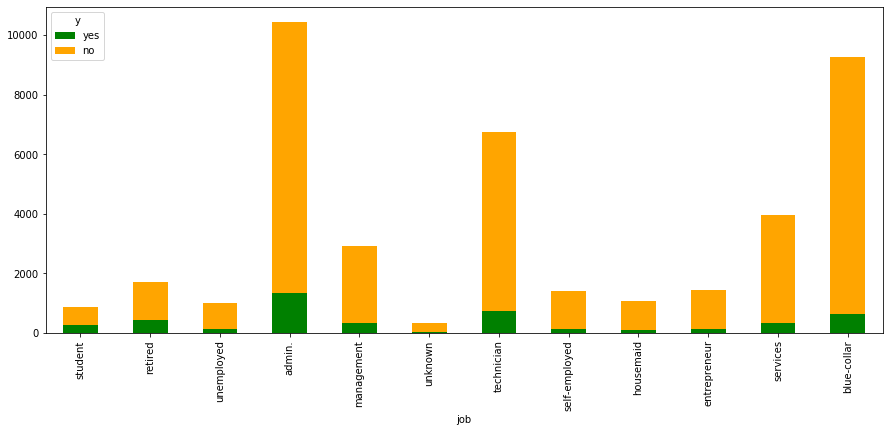

In [9]:
cat_analysis('job')

Here we can see that 'students' and 'retired' peoples responded positively to the campaign.

### Marital distribution

Here we analyze the marital distribution with categorical values and sort them by success percentage in decending order.

y            no   yes  success_rate
marital                            
unknown      68    12      0.150000
single     9948  1620      0.140041
divorced   4136   476      0.103209
married   22396  2532      0.101573


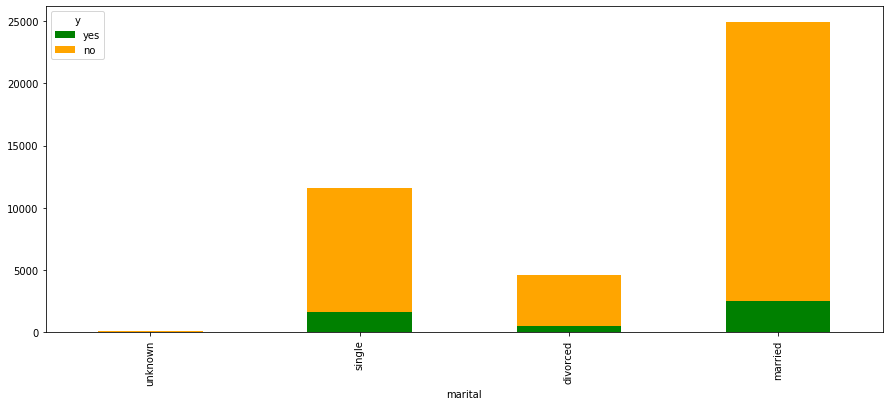

In [10]:
cat_analysis('marital')

Here we can see that 'single' people responded positively than others.

### Previous campaign outcome distribution

Here we analyze the previous campaign outcome distribution with categorical values and sort them by success percentage in decending order.

y               no   yes  success_rate
poutcome                              
success        479   894      0.651129
failure       3647   605      0.142286
nonexistent  32422  3141      0.088322


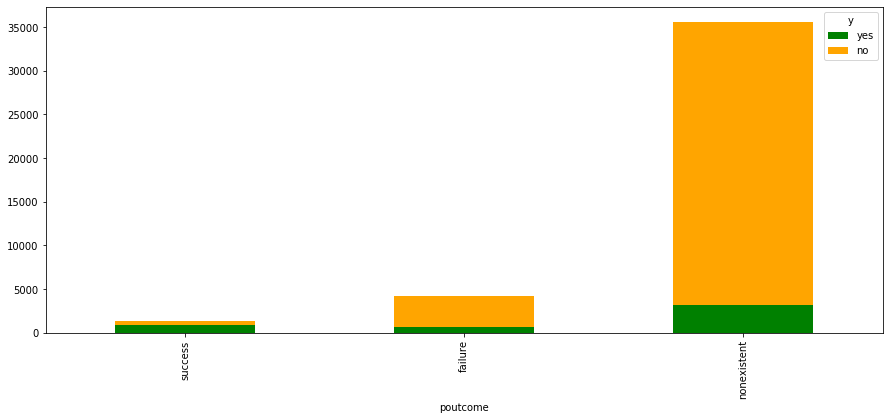

In [11]:
cat_analysis('poutcome')

The success rate illustrates that previously subscribed people responded more positively to the current campaign.

### Contact method distribution

Here we analyze the contact method distribution with categorical values and sort them by success percentage in decending order.

y             no   yes  success_rate
contact                             
cellular   22291  3853      0.147376
telephone  14257   787      0.052313


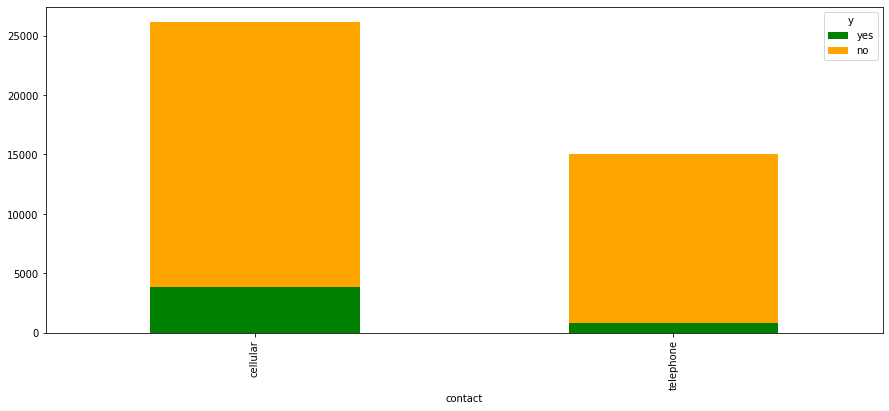

In [12]:
cat_analysis('contact')

The above chart shows that cellular is the more preferred method of communication.

## Correlation

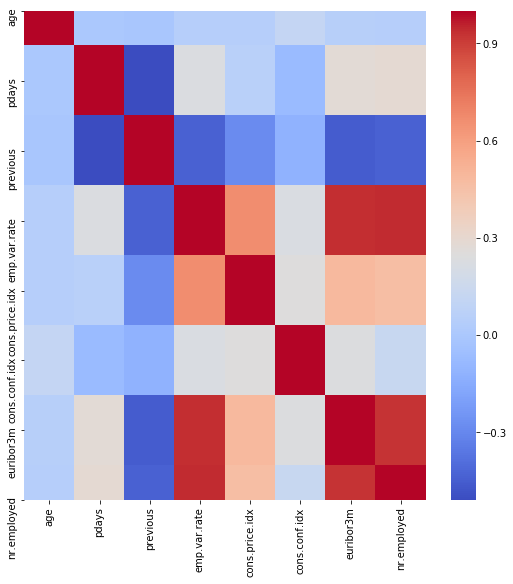

In [13]:
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

The social and economic context attributes have high correlation among them. 'euribor3m', 'nr.employed' and 'euribor3m', 'emp.var.rate' have high correlation among them.

## Missing values and outliers in numerical variables

In [14]:
df.describe()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


"pdays" have the value 999 which is indicated as the customers are never been contacted previously.

"Age", "previous" have outliers since outliers can be defined as $values$ > $Q_3 + 1.5 \times IQR$ or $values$ < $Q_1 - 1.5 \times IQR$. From the analysis of numerical variables we can observe that  max('age') = 98 , max('previous')=7 respectively which are having outliers.

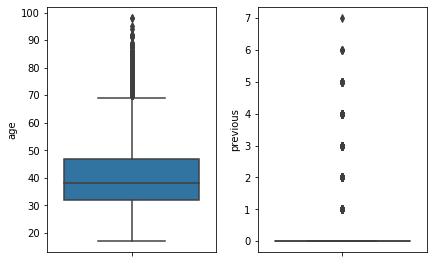

In [15]:
fig, axes = plt.subplots(1, 2)
fig.tight_layout()
sns.boxplot(y=df['age'], ax=axes[0])
sns.boxplot(y=df['previous'], ax=axes[1])

Age is having maximum of 98 and previous is having maximum of 7 which are acceptable values because in a real life setting the values can exist. We do not remove the outliers.

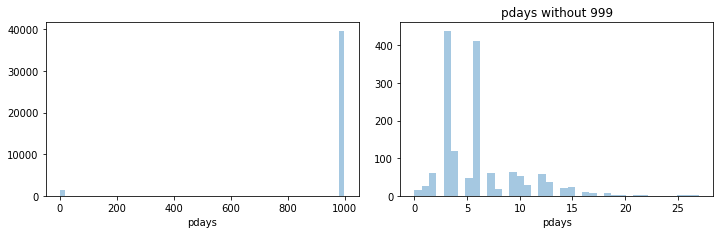

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
fig.tight_layout()
sns.distplot(df['pdays'],kde=False, ax=axes[0])
axes[1].set_title("pdays without 999")
sns.distplot(df.loc[df.pdays != 999, 'pdays'],kde=False, ax=axes[1])
plt.show()

Very high percentage of 'pdays' is having the value 999 which indicates that the clients never been contacted before. We can handle this by changing it as categorical variable.

In [17]:
df['pdays_missing'] = 0
df['pdays_less_5'] = 0
df['pdays_greater_15'] = 0
df['pdays_bet_5_15'] = 0
df['pdays_missing'][df['pdays']==999] = 1
df['pdays_less_5'][df['pdays']<5] = 1
df['pdays_greater_15'][(df['pdays']>15) & (df['pdays']<999)] = 1
df['pdays_bet_5_15'][(df['pdays']>=5)&(df['pdays']<=15)]= 1
df =df.drop('pdays', axis=1);

c:\users\iamku\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\iamku\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\iamku\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import s

## Age distribution
Age distribution with success rate

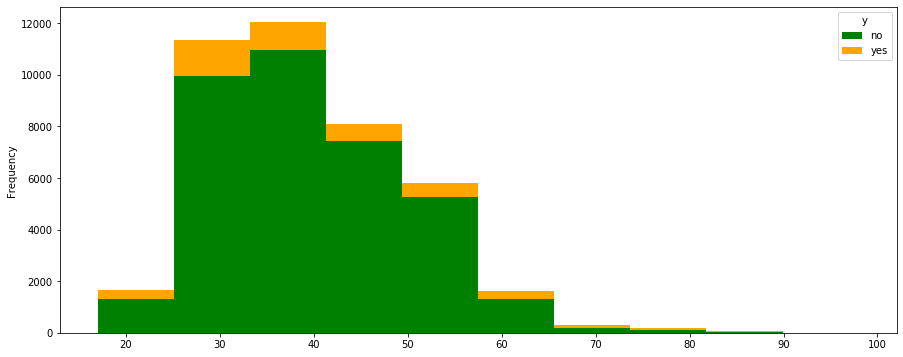

In [18]:
df.pivot(columns='y').age.plot(kind = 'hist', stacked=True,figsize=(15,6), color=['green','orange'])

In [19]:
adult = (df[(df.age < 60) & (df.y=='yes')]['age'].count()/sum(df.age < 60))*100
senior = (df[(df.age > 60) & (df.y=='yes')]['age'].count()/sum(df.age > 60))*100

print('Clients with age less than 60 :',adult,"% subscribed")
print('Clients with age greater than 60 :',senior,"% subscribed")

Clients with age less than 60 : 10.421302662832854 % subscribed
Clients with age greater than 60 : 45.494505494505496 % subscribed


## Categorical variables encoding

In [20]:
df_encoded = pd.get_dummies(df,columns=['housing','loan','job','marital', \
                                     'education','contact','month','day_of_week', \
                                     'poutcome','default'], drop_first=True)

In [21]:
df_encoded.y.replace({'yes': 1, 'no': 0}, inplace=True)
X = df_encoded.drop('y',axis = 1)
y = df_encoded['y'].values

## Scaling 

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Train Test Split

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.25, stratify=y, random_state=0)

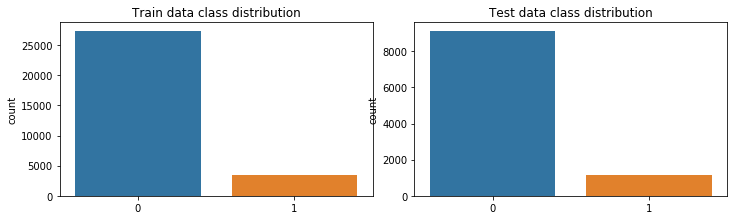

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
fig.tight_layout()
axes[0].set_title("Train data class distribution")
axes[1].set_title("Test data class distribution")
sns.countplot(Y_test, ax=axes[1])
sns.countplot(Y_train, ax=axes[0])

## Evaluation helper functions

In [25]:
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def print_evaluation(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    auc_score = auc(fpr, tpr)
    print(classification_report(y_test, y_pred))
    print('AUC: {}'.format(auc_score))

def model_score(model , test_data, actual_label):
    model_name = type(model).__name__
    y_pred = model.predict(test_data)
    model_f1_score = f1_score(y_true=actual_label, y_pred=y_pred)
    
    return {'classifier':model_name, 'f1-score':model_f1_score}
    

# Build and evaluate Models

I'm creating models with default parameters for initial train and evaluation

## Logistic Regression model

In [28]:
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression()

In [29]:
lgr_model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Decision Tree Model

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier() 

In [31]:
dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Random forrest Model

In [32]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()

In [33]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Gradient Boost model

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gdboost = GradientBoostingClassifier()

In [35]:
gdboost.fit(X_train, Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## AdaBoost Model

In [36]:
from sklearn.ensemble import AdaBoostClassifier
adaBC = AdaBoostClassifier()

In [37]:
adaBC.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

## XGBoost Model

In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [39]:
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## KNN classifier Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [41]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Evaluate Models based on unbalanced data

Evaluate the models with default parameters and record their f1-score based on unbalanced data

In [42]:
models = [lgr_model, dt, random_forest, gdboost, adaBC, xgb, knn]
f1_scores_model = []
for ml_model in models:
    score_data = model_score(model=ml_model, test_data=X_test, actual_label=Y_test)
    f1_scores_model.append(score_data)

df_scores = pd.DataFrame(f1_scores_model)
df_scores.sort_values('f1-score', ascending=False)

,classifier,f1-score
2,RandomForestClassifier,0.366667
3,GradientBoostingClassifier,0.358302
5,XGBClassifier,0.353016
6,KNeighborsClassifier,0.351893
1,DecisionTreeClassifier,0.326105
4,AdaBoostClassifier,0.322122
0,LogisticRegression,0.314767


## Sampling to balance dataset (SMOTE)

Since this is highly imbalanced data, we use oversampling technique by aplying SMOTE to balance the class.

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_balanced, y_balanced = smote.fit_resample(X_train, Y_train)

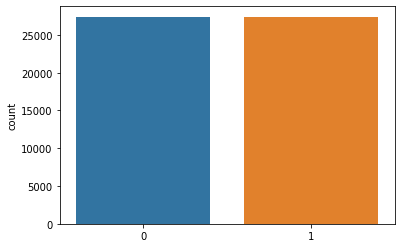

In [44]:
sns.countplot(y_balanced)

In [45]:
f1_scores_balanced_model = []
for ml_model in models:
    ml_model.fit(X_balanced, y_balanced)
    score_data = model_score(model=ml_model, test_data=X_test, actual_label=Y_test)
    f1_scores_balanced_model.append(score_data)

df_scores_balanced = pd.DataFrame(f1_scores_balanced_model)
df_scores_balanced.sort_values('f1-score', ascending=False)

,classifier,f1-score
3,GradientBoostingClassifier,0.475578
5,XGBClassifier,0.473210
4,AdaBoostClassifier,0.462191
0,LogisticRegression,0.439927
2,RandomForestClassifier,0.397115
6,KNeighborsClassifier,0.349087
1,DecisionTreeClassifier,0.320998


The overall performance of the models is improved after balancing the data. XGBoost and Gradient Boosting models shows best performance among tested models.

## Hyperparameter Tuning

I'm tuning hyper parameters for the best two models to improve their performance

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## Gradient Boost Hyper parameter tuning

In [45]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [6,8, 10, 12]
}

In [46]:
grid = GridSearchCV(gdboost, param_grid, n_jobs=-1, scoring='f1')

In [47]:
grid.fit(X_balanced, y_balanced)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [48]:
grid.best_params_

{'max_depth': 12, 'n_estimators': 100}

In [49]:
gdboost_tuned = GradientBoostingClassifier(max_depth=12, n_estimators=100)
gdboost_tuned.fit(X_balanced, y_balanced)
y_predicted = gdboost_tuned.predict(X_test)
f1_score(y_true=Y_test, y_pred=y_predicted)

0.38782877772047447

In [50]:
print_evaluation(Y_test, y_predicted)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9137
           1       0.48      0.32      0.39      1160

    accuracy                           0.88     10297
   macro avg       0.70      0.64      0.66     10297
weighted avg       0.87      0.88      0.87     10297

AUC: 0.6400157751921893


## XGBoost Hyper parameter tuning

In [51]:
param_grid_xgb = {
    'max_depth': [7, 10, 11], 
    'n_estimators': [15, 20, 50, 70], 
    'min_child_weight': [2, 3]
}

In [52]:
gridsearch = GridSearchCV(xgb, param_grid_xgb, n_jobs=-1)

In [53]:
gridsearch.fit(X_balanced, y_balanced)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [7, 10, 11], 'min_child_weight': [2, 3],
                         'n_estimators': [15, 20, 50, 70]},
             pre_dispatch='2*n_jobs',

In [54]:
gridsearch.best_params_

{'max_depth': 11, 'min_child_weight': 2, 'n_estimators': 70}

In [55]:
xgboost_tuned = XGBClassifier(max_depth=11, 
                            n_estimators=70, 
                            min_child_weight=2, 
                            n_jobs=-1)

In [56]:
xgboost_tuned.fit(X_balanced, y_balanced)
y_predicted = xgboost_tuned.predict(X_test)
f1_score(y_true=Y_test, y_pred=y_predicted)

0.4113110539845759

In [57]:
print_evaluation(Y_test, y_predicted)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9137
           1       0.51      0.34      0.41      1160

    accuracy                           0.89     10297
   macro avg       0.71      0.65      0.67     10297
weighted avg       0.87      0.89      0.88     10297

AUC: 0.6513456087978775


Text(0, 0.5, 'Feature')

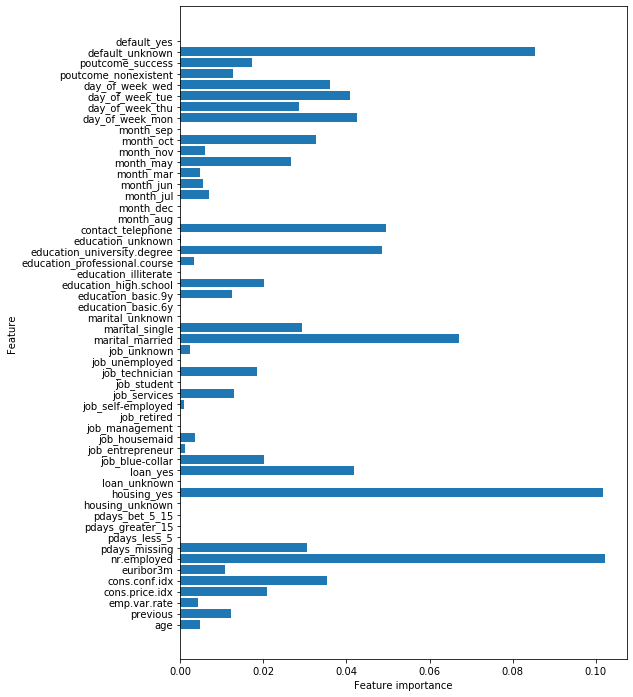

In [47]:
n_features = X_train.shape[1]
plt.figure(figsize=(8,12))
plt.barh(range(n_features), xgb.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X.columns.values) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")

## Findings

- XGBoost model showed best performance among the tested models.
- Most important feature that impact on client's decision is **nr.employed**: number of employees.
- Previously subscibed clients are more positive to the following campaign (65.1%).
- In the current campaign 11.3% of clients subscribed to the term deposit.
- Old people tend to have higher success rate (clients who are over 60 years old subcribed 45.5% of the time).